In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
filepath = r"C:\Users\musan\Downloads\Seoul_Bike_Sharing_Demand_Prediction\SeoulBikeData.csv"

df = pd.read_csv(filepath, encoding='latin1')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [5]:
df["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [6]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "season", "holiday", "functional"]

In [7]:
df = df.drop(["Date"], axis=1)

In [8]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
df.columns = dataset_cols

In [10]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
df["functional"] = (df["functional"] == "yes").astype(int)
df["holiday"] = (df["holiday"] == "Holiday").astype(int)

In [12]:
df["season"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [13]:
df.loc[df["season"] == "Winter", "season"] = 0
df.loc[df["season"] == "Spring", "season"] = 1
df.loc[df["season"] == "Summer", "season"] = 2
df.loc[df["season"] == "Autumn", "season"] = 3

In [14]:
df["season"].unique()

array([0, 1, 2, 3], dtype=object)

In [15]:
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [16]:
df = df.drop(["functional"], axis=1)

In [17]:
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0


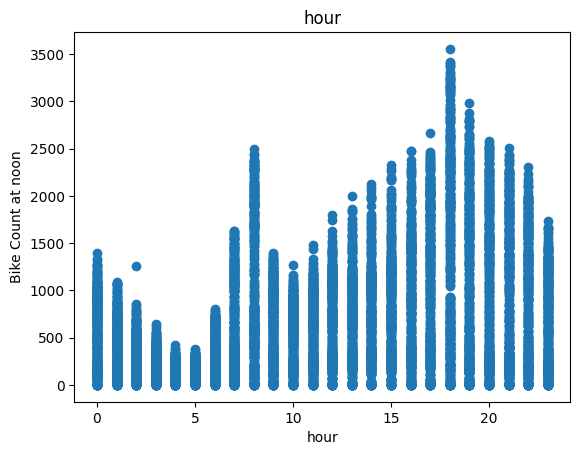

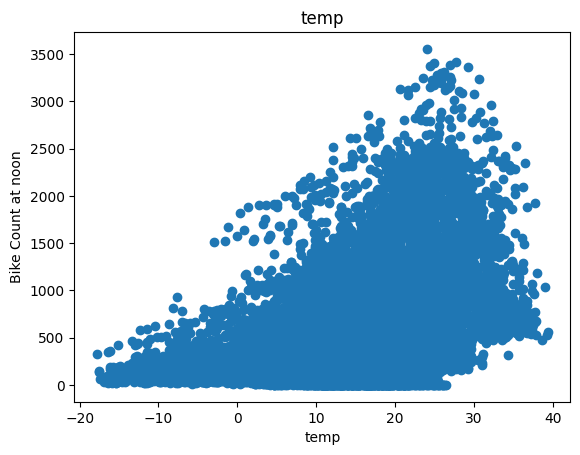

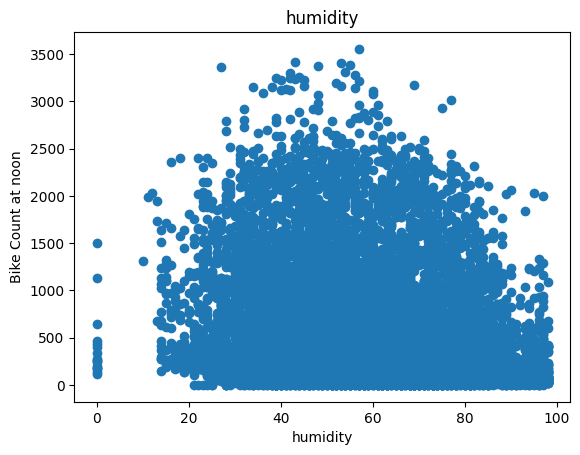

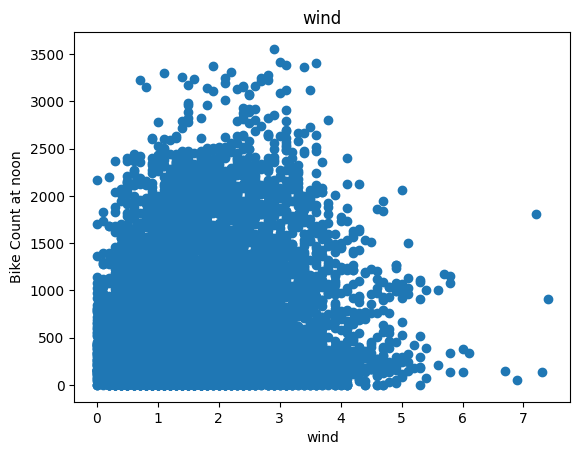

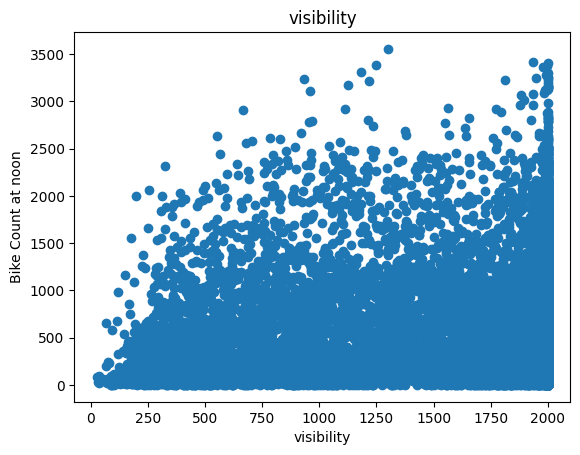

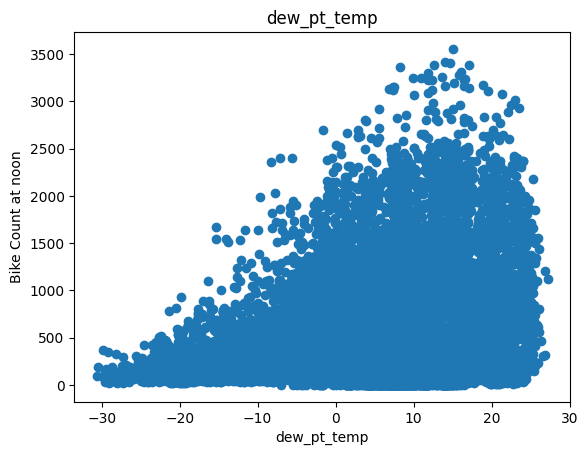

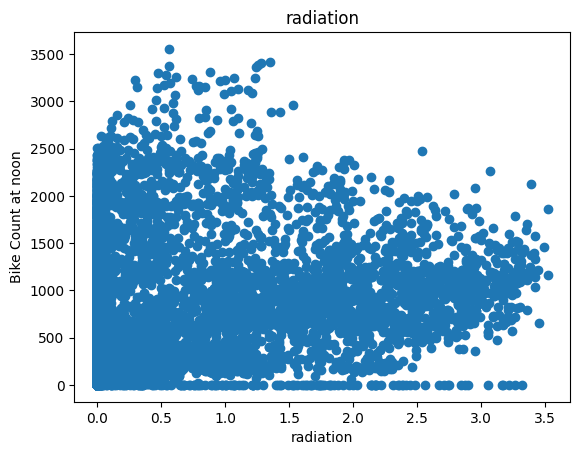

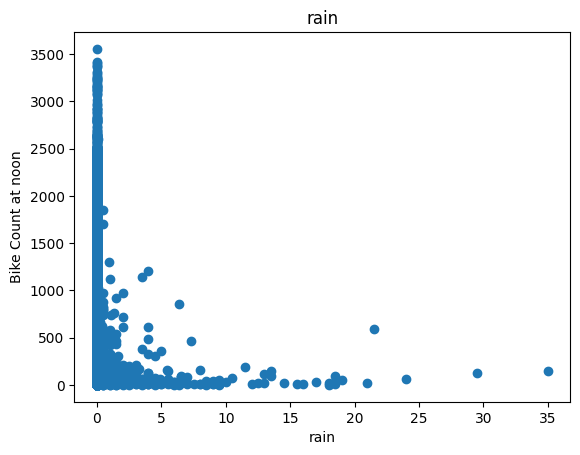

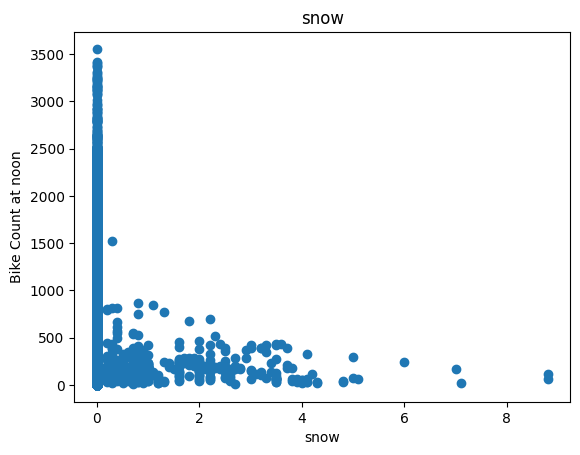

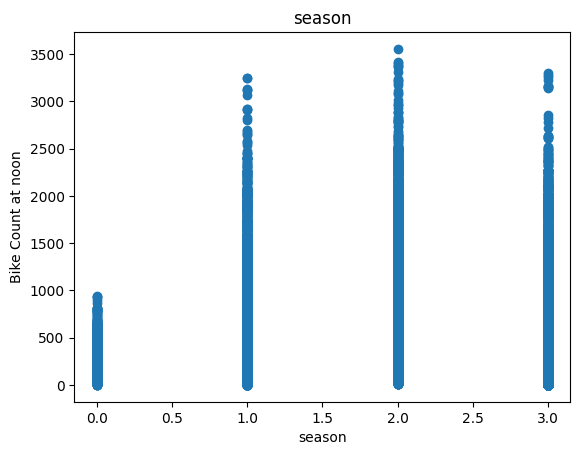

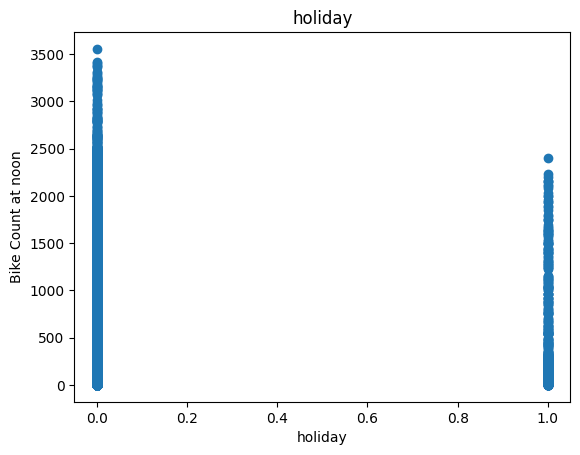

In [18]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike Count at noon")
    plt.show()

# Train test Valid split

In [19]:
train, test = np.split(df.sample(frac=1), [int(0.8*len(df))])

c:\Users\musan\.conda\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
train

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
889,162,1,-3.9,51,0.2,1535,-12.5,0.00,0.0,0.0,0,0
858,635,18,-1.8,44,2.2,1709,-12.4,0.01,0.0,0.0,0,0
2672,1174,8,1.1,79,1.7,1480,-2.1,0.36,0.0,0.0,1,0
2391,931,15,8.1,36,4.7,1964,-6.1,2.23,0.0,0.0,1,0
2801,960,17,18.4,54,3.2,605,8.9,1.05,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,243,11,22.7,93,4.8,832,21.5,0.17,0.0,0.0,1,0
7664,2134,8,10.4,63,0.6,1367,3.6,0.19,0.0,0.0,3,0
7039,130,7,18.0,95,1.6,375,17.1,0.00,1.5,0.0,3,0
8064,642,0,7.2,64,1.0,1639,0.8,0.00,0.0,0.0,3,0


In [21]:
test

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
1365,130,21,-14.1,36,1.8,1869,-25.9,0.00,0.0,0.3,0,0
2035,421,19,6.9,73,3.7,369,2.3,0.00,0.0,0.0,0,0
2836,109,4,12.8,81,0.2,418,9.6,0.00,0.0,0.0,1,0
5455,1344,7,24.5,73,0.9,1901,19.3,0.36,0.0,0.0,2,0
3493,1141,13,20.8,23,1.7,1467,-1.1,3.18,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7338,0,18,19.2,48,2.2,2000,7.9,0.28,0.0,0.0,3,0
8030,963,14,11.9,34,2.4,1835,-3.4,2.12,0.0,0.0,3,0
2550,109,6,0.8,63,1.0,2000,-5.4,0.00,0.0,0.0,1,0
3965,182,5,15.7,76,0.6,330,11.4,0.00,0.0,0.0,1,0


In [22]:
def get_xy(dataframe, x_label=None, y_label=None):

    if x_label is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values

    else:
        if len(x_label) == 1:
            X = dataframe[x_label[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_label].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data, X, y

### Only temperature feature is used

In [139]:
_, X_train_temp, y_train_temp = get_xy(train, x_label=["temp"], y_label = "bike_count")
_, X_test_temp, y_test_temp = get_xy(test, x_label=["temp"], y_label = "bike_count")

In [140]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)
temp_reg.score(X_test_temp, y_test_temp)

0.2865192580231316

In [28]:
y_pred = temp_reg.predict(X_test_temp)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test_temp, y_pred)

0.272780905795307

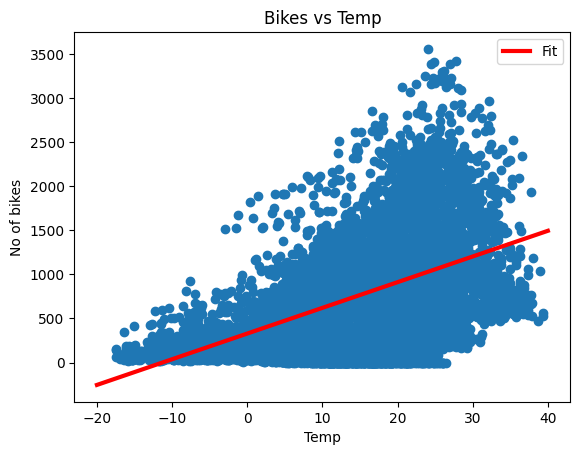

In [30]:
plt.scatter(X_train_temp, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No of bikes")
plt.show()

## Polynomial (Non Linear Regression)

In [24]:
poly = PolynomialFeatures(degree=10, include_bias=True)

X_train_trans = poly.fit_transform(X_train_temp)
X_test_trans = poly.fit_transform(X_test_temp)

NameError: name 'X_train_temp' is not defined

In [133]:
print(X_train_temp[3])
print(X_train_trans[3])

[26.9]
[1.00000000e+00 2.69000000e+01 7.23610000e+02 1.94651090e+04
 5.23611432e+05 1.40851475e+07 3.78890468e+08 1.01921536e+10
 2.74168932e+11 7.37514427e+12 1.98391381e+14]


In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_standardized = scaler.fit_transform(X_train_trans)
X_test_standardized = scaler.fit_transform(X_test_trans)

In [129]:
X_standardized

array([[0.00000000e+00, 3.60281195e-01, 5.79762426e-03, ...,
        1.12979660e-09, 6.72332970e-04, 6.55013618e-12],
       [0.00000000e+00, 3.19859402e-01, 3.15648432e-04, ...,
        9.92692054e-15, 6.72332884e-04, 3.13341690e-18],
       [0.00000000e+00, 4.74516696e-01, 5.81372877e-02, ...,
        1.14240230e-05, 6.75085555e-04, 6.64161711e-07],
       ...,
       [0.00000000e+00, 7.78558875e-01, 4.62676183e-01, ...,
        4.58256441e-02, 3.18221184e-02, 2.12024341e-02],
       [0.00000000e+00, 2.24956063e-01, 1.42299467e-02, ...,
        4.10027598e-08, 6.72327996e-04, 5.83467085e-10],
       [0.00000000e+00, 4.46397188e-01, 4.02033034e-02, ...,
        2.61244380e-06, 6.72856346e-04, 1.05028870e-07]])

In [146]:
trans_reg = LinearRegression()
trans_reg.fit(X_train_trans, y_train_temp)
trans_reg.score(X_test_trans, y_test_temp)

0.2923663779715926

In [145]:
X_train_temp[0]

array([-8.1])

In [98]:
X_new=X_train_trans[:,5]
X_new

array([ 2.43000000e+02,  1.68070000e-01,  7.73780938e+04, ...,
        1.38252811e+07, -2.29345007e+03,  3.07705640e+04])

In [99]:
X_new=X_train_temp
#X_new_poly = poly.transform(X_new)
y_new = trans_reg.predict(X_train_trans)

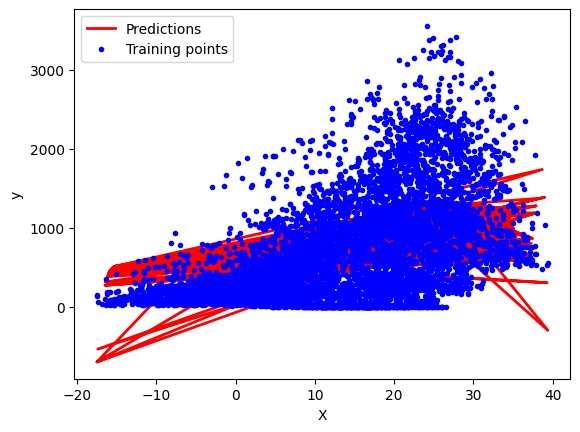

In [100]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train_temp, y_train_temp, "b.",label='Training points')
#plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [147]:
x = tf.linspace(-20, 40, 100)
x = np.array(x).reshape(-1,1)
x_trans = poly.fit_transform(x)
y = trans_reg.predict(x_trans)

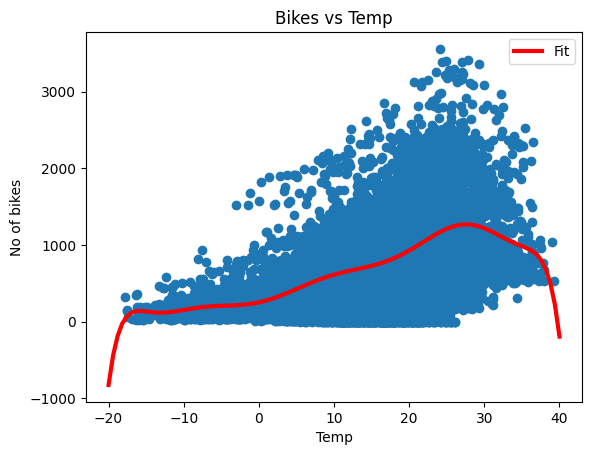

In [148]:
plt.scatter(X_train_temp, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, y, label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No of bikes")
plt.show()

In [23]:
_, X_train_all, y_train_all = get_xy(train, x_label=df.columns[1:], y_label = "bike_count")
_, X_test_all, y_test_all = get_xy(test, x_label=df.columns[1:], y_label = "bike_count")

In [26]:
X_train_all.shape

(7008, 11)

In [24]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [27]:
all_reg.score(X_test_all, y_test_all)

0.4990291683943042

In [29]:
all_reg.coef_

array([[ 2.72433909e+01,  2.65236863e+01, -8.19232588e+00,
         1.05800314e+01, -2.53976868e-03,  1.09862762e+00,
        -7.29197312e+01, -6.16461086e+01,  1.44928680e+01,
         6.70669862e+01, -1.75810667e+02]])

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_trans = poly.fit_transform(X_train_all)
X_test_trans = poly.fit_transform(X_test_all)

In [45]:
X_train_trans.shape

(7008, 77)

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train_trans)
X_test_standardized = scaler.fit_transform(X_test_trans)

In [51]:
trans_reg_with_normalization = LinearRegression()
trans_reg_with_normalization.fit(X_standardized, y_train_all)
trans_reg_with_normalization.score(X_test_standardized, y_test_all)

0.6042129320378324

In [54]:
X_test_trans

array([[ 21. , -14.1,  36. , ...,   0. ,   0. ,   0. ],
       [ 19. ,   6.9,  73. , ...,   0. ,   0. ,   0. ],
       [  4. ,  12.8,  81. , ...,   1. ,   0. ,   0. ],
       ...,
       [  6. ,   0.8,  63. , ...,   1. ,   0. ,   0. ],
       [  5. ,  15.7,  76. , ...,   1. ,   0. ,   0. ],
       [  4. ,  -5.1,  60. , ...,   0. ,   0. ,   0. ]])

In [52]:
X_test_standardized

array([[ 1.38372827, -2.18418562, -1.10518184, ..., -0.98869616,
        -0.15780234, -0.23270502],
       [ 1.09779421, -0.46994775,  0.75996897, ..., -0.98869616,
        -0.15780234, -0.23270502],
       [-1.04671124,  0.01167147,  1.16324482, ..., -0.69614496,
        -0.15780234, -0.23270502],
       ...,
       [-0.76077718, -0.96789303,  0.25587415, ..., -0.69614496,
        -0.15780234, -0.23270502],
       [-0.90374421,  0.24839955,  0.91119741, ..., -0.69614496,
        -0.15780234, -0.23270502],
       [-1.04671124, -1.44951225,  0.10464571, ..., -0.98869616,
        -0.15780234, -0.23270502]])

In [68]:
#trans_reg = LinearRegression()
#trans_reg.fit(X_train_trans, y_train_all)
trans_reg.score(X_test_trans, y_test_all)

0.6049786493092666

In [66]:
poly.fit_transform(X_test_all[100].reshape(1,-1)).shape

(1, 77)

In [67]:
(X_test_trans[100].reshape(1,-1)).shape

(1, 77)

In [57]:
trans_reg.predict(X_test_trans[100].reshape(1,-1))

array([[382.18966929]])

In [61]:
y_test_all[100]

array([816], dtype=int64)

In [58]:
import joblib

# Load the model
loaded_model = joblib.load('model.pkl')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test_trans)


ValueError: X has 4367 features, but LinearRegression is expecting 363 features as input.

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = trans_reg.predict(X_test_trans)
mean_absolute_error(y_test_all, y_pred)

246.25648995222423

In [45]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(trans_reg, file)

In [175]:
X_test_trans[0].shape

(363,)

In [179]:
y_pred = trans_reg.predict(X_test_trans[100].reshape(1, -1))
y_pred

array([[942.56099819]])

In [180]:
y_test_all[100]

array([719], dtype=int64)

## Multiple regression with data normalization

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train_all)
X_test_standardized = scaler.fit_transform(X_test_all)

NameError: name 'X_train_all' is not defined

In [30]:
std_reg = LinearRegression()
std_reg.fit(X_standardized, y_train_all)
std_reg.score(X_test_standardized, y_test_all)

0.47323486006003934

In [31]:
y_test_all

array([[ 889],
       [  86],
       [ 916],
       ...,
       [  65],
       [ 273],
       [1096]], dtype=int64)

In [34]:
y_pred = std_reg.predict(X_test_standardized)

In [35]:
y_pred

array([[ 954.63038948],
       [ 438.36696977],
       [1046.7683325 ],
       ...,
       [-159.09174953],
       [ -23.45401269],
       [1039.91874762]])

## Min Max scaling

In [36]:
min_max_sclr = MinMaxScaler()
X_min_max_train = min_max_sclr.fit_transform(X_train_all)
X_min_max_test = min_max_sclr.fit_transform(X_test_all)

In [37]:
min_max_reg = LinearRegression()
min_max_reg.fit(X_min_max_train, y_train_all)
min_max_reg.score(X_min_max_test, y_test_all)

0.46897711287542077

In [38]:
X_min_max_train

array([[0.04347826, 0.34150613, 0.7244898 , ..., 0.        , 0.        ,
        0.        ],
       [0.82608696, 0.8056042 , 0.83673469, ..., 0.        , 0.66666667,
        0.        ],
       [0.08695652, 0.21541156, 0.54081633, ..., 0.18181818, 0.        ,
        0.        ],
       ...,
       [1.        , 0.46234676, 0.70408163, ..., 0.        , 0.33333333,
        0.        ],
       [0.47826087, 0.80910683, 0.35714286, ..., 0.        , 0.66666667,
        0.        ],
       [0.13043478, 0.69527145, 0.64285714, ..., 0.        , 0.66666667,
        0.        ]])

In [39]:
y_test_all

array([[ 889],
       [  86],
       [ 916],
       ...,
       [  65],
       [ 273],
       [1096]], dtype=int64)

In [40]:
y_pred = min_max_reg.predict(X_min_max_test)
y_pred

array([[ 935.16400163],
       [ 412.48198411],
       [1026.65629911],
       ...,
       [-187.54295745],
       [ -49.78491739],
       [1019.85211038]])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = min_max_reg.predict(X_test_standardized)
mse = mean_squared_error(y_test_all, y_pred)
mse

6874191.532273962

In [45]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 1.26.3
pandas 2.1.4
sklearn 1.3.2


In [46]:
import pickle

In [71]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(trans_reg, file)

In [49]:
import sys
print("Python version:", sys.version)

Python version: 3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]


In [52]:
x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 1, 0, 2, 1])

In [51]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_pt_temp', 'radiation', 'rain', 'snow', 'season', 'holiday'],
      dtype='object')

In [56]:
std_reg.predict(x_pred.reshape(1,-1))

array([[981.92812711]])

In [66]:
X_test_all[0]

array([13, 13.3, 36, 2.1, 1283, -1.4, 1.99, 0.0, 0.0, 3, 0], dtype=object)

In [62]:
y_pred = min_max_reg.predict(X_test_all[0].reshape(1,-1))
y_pred

array([[-18582.86732419]])